In [1]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import math
import numpy as np
import copy
import pandapower.shortcircuit as sc
import pandapower.control as ct
import statistics as stat
#from matplotlib.transforms import BlendedGenericTransform
#from pandapower.plotting import simple_plot, simple_plotly, pf_res_plotly

# Predefined network of IEEE 4gs bus system 
net_temp = pp.networks.case4gs()
#plot.simple_plot(net)

In [2]:
#COPY PARAMETERS FROM TEMP NETWORK TO USE IN 2 BUS RADIAL SYSTEM.
#BUSES
b0_in_service = net_temp.bus.in_service[0]
b0_max_vm_pu = net_temp.bus.max_vm_pu[0]
b0_min_vm_pu = net_temp.bus.min_vm_pu[0]
b0_name = net_temp.bus.name[0]
b0_type = net_temp.bus.type[0]
b0_vn_kv = net_temp.bus.vn_kv[0]
b0_zone = net_temp.bus.zone[0]
b0_geodata = (3,2)

b1_in_service = net_temp.bus.in_service[1]
b1_max_vm_pu = net_temp.bus.max_vm_pu[1]
b1_min_vm_pu = net_temp.bus.min_vm_pu[1]
b1_name = net_temp.bus.name[1]
b1_type = net_temp.bus.type[1]
b1_vn_kv = net_temp.bus.vn_kv[1]
b1_zone = net_temp.bus.zone[1]
b1_geodata = (4,2)

#BUS ELEMENTS
load_bus = net_temp.load.bus[1]
load_in_service = net_temp.load.in_service[1]
load_p_mw = net_temp.load.p_mw[1]
load_q_mvar = net_temp.load.q_mvar[1]
load_scaling = net_temp.load.scaling[1]

extGrid_bus = net_temp.ext_grid.bus[0]
extGrid_in_service = net_temp.ext_grid.in_service[0]
extGrid_va_degree = net_temp.ext_grid.va_degree[0]
extGrid_vm_pu = net_temp.ext_grid.vm_pu[0]
extGrid_max_p_mw = net_temp.ext_grid.max_p_mw[0]
extGrid_min_p_mw = net_temp.ext_grid.min_p_mw[0]
extGrid_max_q_mvar = net_temp.ext_grid.max_q_mvar[0]
extGrid_min_q_mvar = net_temp.ext_grid.min_q_mvar[0]

#LINES
line0_scaling = 1
line0_c_nf_per_km = net_temp.line.c_nf_per_km[0]
line0_df = net_temp.line.df[0]
line0_from_bus = net_temp.line.from_bus[0]
line0_g_us_per_km = net_temp.line.g_us_per_km[0]
line0_in_service = net_temp.line.in_service[0]
line0_length_km = net_temp.line.length_km[0]
line0_max_i_ka = net_temp.line.max_i_ka[0]
line0_max_loading_percent = net_temp.line.max_loading_percent[0]
line0_parallel = net_temp.line.parallel[0]
line0_r_ohm_per_km = net_temp.line.r_ohm_per_km[0] * line0_scaling
line0_to_bus = net_temp.line.to_bus[0]
line0_type = net_temp.line.type[0]
line0_x_ohm_per_km = net_temp.line.x_ohm_per_km[0] * line0_scaling


line1_scaling = 1.2
line1_c_nf_per_km = line0_c_nf_per_km
line1_df = line0_df
line1_from_bus = line0_from_bus 
line1_g_us_per_km = line0_g_us_per_km
line1_in_service = line0_in_service
line1_length_km = line0_length_km
line1_max_i_ka = line0_max_i_ka
line1_max_loading_percent = line0_max_loading_percent
line1_parallel = line0_parallel 
line1_r_ohm_per_km = line0_r_ohm_per_km
line1_to_bus = line0_to_bus
line1_type = line0_type
line1_x_ohm_per_km = line0_x_ohm_per_km * line1_scaling
print(load_p_mw)
print(load_q_mvar)

170.0
105.35000000000001


In [3]:
#CREATE 2 BUS SYSTEM
net_2b = pp.create_empty_network()

#Create buses
b0 = pp.create_bus(net_2b, in_service=b0_in_service, max_vm_pu=b0_max_vm_pu, min_vm_pu=b0_min_vm_pu, 
                   name=b0_name, type=b0_type, vn_kv=b0_vn_kv, zone= b0_zone, geodata=b0_geodata)

b1 = pp.create_bus(net_2b, in_service=b1_in_service, max_vm_pu=b1_max_vm_pu, min_vm_pu=b1_min_vm_pu, 
                   name=b1_name, type=b1_type, vn_kv=b1_vn_kv, zone= b1_zone, geodata=b1_geodata)



#Create bus elements
load = pp.create_load(net_2b, bus=load_bus, in_service=load_in_service, 
                      p_mw=load_p_mw, q_mvar=load_q_mvar, scaling=load_scaling)

extGrid = pp.create_ext_grid(net_2b, bus=extGrid_bus, in_service=extGrid_in_service, va_degree=extGrid_va_degree,
                             vm_pu=extGrid_vm_pu, max_p_mw=extGrid_max_p_mw, min_p_mw=extGrid_min_p_mw,
                             max_q_mvar=extGrid_max_q_mvar, min_q_mvar=extGrid_min_q_mvar)

# Create lines
l0 = pp.create_line_from_parameters(net_2b, c_nf_per_km=line0_c_nf_per_km, df=line0_df, from_bus=line0_from_bus,
                   g_us_per_km=line0_g_us_per_km, in_service=line0_in_service, length_km=line0_length_km,
                   max_i_ka=line0_max_i_ka, max_loading_percent=line0_max_loading_percent,
                   parallel=line0_parallel, r_ohm_per_km=line0_r_ohm_per_km, to_bus=line0_to_bus, 
                   type=line0_type, x_ohm_per_km=line0_x_ohm_per_km)

l1 = pp.create_line_from_parameters(net_2b, c_nf_per_km=line1_c_nf_per_km, df=line1_df, from_bus=line1_from_bus,
                   g_us_per_km=line1_g_us_per_km, in_service=line1_in_service, length_km=line1_length_km,
                   max_i_ka=line1_max_i_ka, max_loading_percent=line1_max_loading_percent,
                   parallel=line1_parallel, r_ohm_per_km=line1_r_ohm_per_km, to_bus=line1_to_bus, 
                   type=line1_type, x_ohm_per_km=line1_x_ohm_per_km)

In [4]:
####Shunt FACTS device (bus 1)
#MV bus
bus_SVC = pp.create_bus(net_2b, name='MV SVCtrafo bus', vn_kv=69, type='n', geodata=(4.04,1.98), zone=2, max_vm_pu=1.1,
                        min_vm_pu=0.9)
#Trafo
trafoSVC = pp.create_transformer_from_parameters(net_2b, hv_bus=1, lv_bus=2, in_service=True, 
                                                name='trafoSVC', sn_mva=110, vn_hv_kv=230 , vn_lv_kv=69, 
                                                vk_percent=12, vkr_percent=0.26, pfe_kw=55, i0_percent=0.06,
                                                shift_degree=0, tap_side='hv', tap_neutral=0, tap_min=-9, tap_max=9,
                                                tap_step_percent=1.5, tap_step_degree=0, tap_phase_shifter=False) 
#Breaker between grid HV bus and trafo HV bus to connect buses
sw_SVC = pp.create_switch(net_2b, bus=1, element=0, et='t', type='CB', closed=False)
#Shunt devices connected with MV bus
shuntDev = pp.create_shunt(net_2b, bus_SVC, 2, in_service=True, name='Shunt Device', step = 1)
#trafo_control = ct.DiscreteTapControl(net=net_2b, tid=0,vm_lower_pu=0.98, vm_upper_pu=1.02)

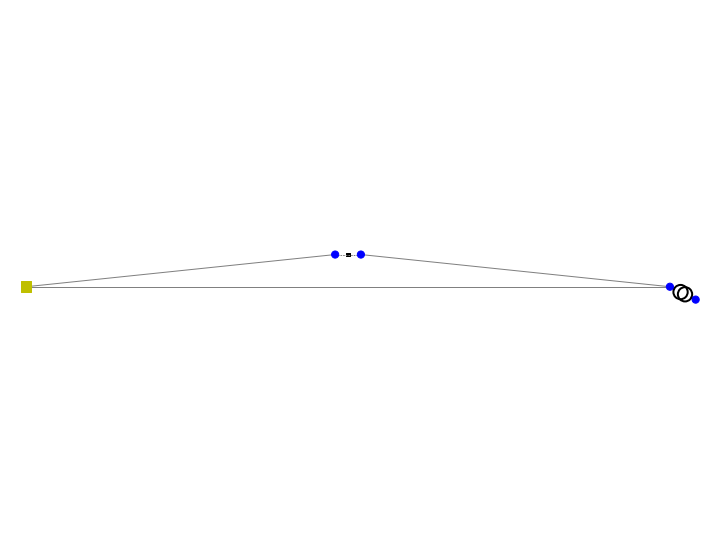

In [5]:
####Series device (at line 1, in middle between bus 0 and 1)
#Add intermediate buses for bypass and series compensation impedance
bus_SC1 = pp.create_bus(net_2b, name='SC bus 1', vn_kv=230, type='n', geodata=(3.48,2.05), 
                        zone=2, max_vm_pu=1.1, min_vm_pu=0.9)
bus_SC2 = pp.create_bus(net_2b, name='SC bus 2', vn_kv=230, type='n', geodata=(3.52,2.05), 
                        zone=2, max_vm_pu=1.1, min_vm_pu=0.9)
sw_SC_bypass = pp.create_switch(net_2b, bus=3, element=4, et='b', type='CB', closed=True)
imp_SC = pp.create_impedance(net_2b, from_bus=3, to_bus=4, rft_pu=0.0000001272, xft_pu=-0.0636,
                             rtf_pu=0.0000001272, xtf_pu=-0.0636, sn_mva=250, in_service=True) #Just some default values
#Adjust orginal Line 3 to connect to new buses instead.
net_2b.line.at[1, ['length_km', 'to_bus', 'name']] = [0.5, 3, 'line1_SC']                        
lineSC2 = pp.create_line_from_parameters(net_2b, name='line2_SC', c_nf_per_km=net_2b.line.at[1,'c_nf_per_km'],
                       df=net_2b.line.at[1, 'df'], from_bus=4, g_us_per_km=net_2b.line.at[1, 'g_us_per_km'],
                       in_service=net_2b.line.at[1, 'in_service'], length_km=0.5, max_i_ka=net_2b.line.at[1, 'max_i_ka'],
                       max_loading_percent=net_2b.line.at[1, 'max_loading_percent'], parallel=net_2b.line.at[1, 'parallel'],
                       r_ohm_per_km=net_2b.line.at[1, 'r_ohm_per_km'], std_type=net_2b.line.at[1, 'std_type'], to_bus=1, 
                       type=net_2b.line.at[1, 'type'], x_ohm_per_km=net_2b.line.at[1, 'x_ohm_per_km'])
plot.simple_plot(net_2b)

In [6]:
##Function to calculate line reactance in pu
def X_pu(net, line_index):  
    s_base = 100e6
    v_base = 230e3
    x_base = pow(v_base,2) / s_base
    x_line_ohm = net_2b.line.x_ohm_per_km[line_index]
    x_line_pu = x_line_ohm / x_base # Can take one since this line is divivded into 
                                                  # 2 identical lines with length 0.5 km
    return x_line_pu

In [7]:
##Function to calculate loadingt percentage reference for the series compensation
def LP_ref(net):
    lp_ref = stat.mean(net.res_line.loading_percent)
    return lp_ref  

In [8]:
##Function to return a reference network with FACTS devices disabled with results aquired after pp.runpp()
def Net_copy_noFACTS(net):
    network = copy.deepcopy(net) #To not changing anything in actual network
    network.switch.closed[0] = False 
    network.switch.closed[1] = True
    pp.runpp(network)
    return network

In [9]:
##Function for nose curve
def NoseCurve(bus_index, net, shunt, sc, line_load_limit):
    network = Net_copy_noFACTS(net) #To not changing anything in actual network
    fig = plt.figure()
    
    load_increment = 0.02
    load_start = 0.1
    load_prev = 0.1 - load_increment
    l_arr = np.array([])
    v_res = np.array([])
    l_ind = 0
    line_ind = 1
    l_p_mw = network.load.p_mw[l_ind]
    l_q_mvar = network.load.q_mvar[l_ind]
    x_line_pu = X_pu(network, 1)
    k_old = 0 #initialise as 0
    q_old = 0
    networkFailure = False
        
    while not networkFailure: 
        #Scaling
        l_scaling = load_prev + load_increment
        load_prev = l_scaling
        network.load.p_mw[l_ind] = l_p_mw*l_scaling
        network.load.q_mvar[l_ind] = l_q_mvar*l_scaling
        
        try:            
            pp.runpp(network)
            
            # Enable FACTS devices if they should be
            network.switch.closed[0] = shunt 
            if sc == True:
                network.switch.closed[1] = False
            else: 
                network.switch.closed[1] = True
            
            # Shunt compensation
            v_ref_pu = 1
            q_comp = Shunt_q_comp(network, v_ref_pu, bus_index, q_old)
            network.shunt.q_mvar =  q_comp
            #print(network.shunt.q_mvar)

            # Series compensation
            i_ref = 41.12944816652619#45.12148693231915 #Should be changed every X time steps to emulate 
                                      #change by system operator when implemented in RL.
            k_x_comp_pu = K_x_comp_pu(network, i_ref, line_ind, k_old)
            network.impedance.loc[0, ['xft_pu','xtf_pu']] = x_line_pu * k_x_comp_pu
            #print(k_x_comp_pu)
        
            pp.runpp(network)
            
            if len([x for x in network.res_line.loading_percent if x >line_load_limit])>0:
                networkFailure=True;
                print('Nosecurve stop: line load limit reached')
            if not networkFailure:
                v_res = np.append(v_res, network.res_bus.vm_pu[bus_index])    
                l_arr = np.append(l_arr, l_scaling)
                q_old = q_comp #update for next iter
                k_old = k_x_comp_pu 
        except:
            networkFailure=True
            print('Nosecurve stop: runpp diverge')
        
        # Reset FACTS devices to get proper transition next time step.
        network.switch.closed[0] = False 
        network.switch.closed[1] = True

    plt.plot(l_arr, v_res, figure=fig)
    plt.ylabel('Bus Voltage [pu]')
    plt.xlabel('Active power [pu]')
    plt.grid(True)
    
    return [fig, v_res, l_arr]

In [10]:
##Function to merge figures into 1
def MergeFig(v_res1, l_arr1, label1, v_res2, l_arr2, label2, v_res3, l_arr3, label3):
    fig = plt.figure()
    plt.plot(l_arr1, v_res1, figure=fig, label=label1)
    plt.plot(l_arr2, v_res2, figure=fig, label=label2)
    plt.plot(l_arr3, v_res3, figure=fig, label=label3)
    plt.ylabel('Bus Voltage [pu]')
    plt.xlabel('Active power load at bus [scaling relative to nominal IEEE]')
    plt.grid(True)
    plt.legend()
    return fig    

In [11]:
# SHUNT CONTROLLER
class ShuntFACTS(ct.basic_controller.Controller):
    def __init__(self, net, busVoltageInd, v_ref_pu, convLim, max_iter=30, shuntIndex=0, q_mvar_rating=50, in_service=True,
                 recycle=False, order=0, level=0, **kwargs):
        # construct through superclass
        super().__init__(net, in_service=in_service, recycle=recycle, order=order, level=level, 
                         initial_powerflow = True, **kwargs)
        
        # Initialise class variables
        self.shuntIndex = shuntIndex
        self.busVoltageInd = busVoltageInd
        self.ref = v_ref_pu # reference value to reach
        self.convLim = convLim # limit threshold for convergence
        self.meas = self.net.res_bus.vm_pu[busVoltageInd]
        self.applied = False
        self.q_mvar_max = q_mvar_rating
        self.q_mvar_min = -q_mvar_rating
        self.iter_counter = 0 # count number of iterations
        self.maxed_counter = 0 #To count iterations if maxed out and cant converge to v_ref
        self.max_iter = max_iter
        self.v_delta = 0
        self.v_delta_accum = 0

    # return boolean for if controled has converged to ref value
    def is_converged(self):
        self.meas = self.net.res_bus.vm_pu[self.busVoltageInd]
        #Converged if within limit or output maxed for three iterations without convergence
        if abs(self.meas-self.ref) < self.convLim or self.maxed_counter >= 4 or self.iter_counter == self.max_iter:
            self.applied = True              
        return self.applied

    # In case the controller is not yet converged, the control step is executed. 
    def control_step(self):
        # Measurement
        self.meas = self.net.res_bus.vm_pu[self.busVoltageInd]
        self.v_delta = self.meas - self.ref
        
        # Control Coefficients
        K_p = 10 # Factor 10 is to cap at rating when v_delta is +/- 0.1 pu.
        K_i = 15
        
        # PI-control equation
        self.net.shunt.q_mvar[self.shuntIndex] = K_p*self.q_mvar_max*(self.v_delta) + K_i * self.q_mvar_max*  self.v_delta_accum

        # Make sure output don't exceed rating
        if self.net.shunt.q_mvar[self.shuntIndex] + 0.00001 >= self.q_mvar_max:
            self.net.shunt.q_mvar[self.shuntIndex] = self.q_mvar_max
            self.maxed_counter += 1    
        elif self.net.shunt.q_mvar[self.shuntIndex] - 0.00001 <= self.q_mvar_min:
            self.net.shunt.q_mvar[self.shuntIndex] = self.q_mvar_min
            self.maxed_counter += 1

        # Update for posible next iter of control
        #print('SHUNT:')
        #print(self.v_delta_accum)
        self.v_delta_accum += self.v_delta
        self.iter_counter += 1
        
        #print(self.net.shunt.q_mvar[self.shuntIndex])
        #print(self.meas)
        #print(self.iter_counter)
        #print(self.maxed_counter)
        
        
    # Finalize function MIGHT BE NEEDED IF RESET OF SOME CLASS VARIABLES NEEDED: DEPENDS ON HOW CALLED IN MAIN MODEL
    def finalize_control(self):
        self.applied = False
        self.v_delta_accum = 0
        self.iter_counter = 0 # count number of iterations
        self.maxed_counter = 0 #To count iterations if maxed out and cant converge to v_ref   

In [12]:
#Series CONTROLLER
class SeriesFACTS(ct.basic_controller.Controller):
    def __init__(self, net, lineLPInd, lp_ref, convLim, x_line_pu, max_iter=30, switchInd=1,serIndex=0, x_comp_rating=0.4, in_service=True,
                 recycle=False, order=0, level=0, **kwargs):
        # construct through superclass
        super().__init__(net, in_service=in_service, recycle=recycle, order=order, level=level, 
                         initial_powerflow = True, **kwargs)
        
        # Initialise class variables
        self.switchInd = switchInd
        self.x_line_pu = x_line_pu
        self.serIndex = serIndex
        self.lineLPInd = lineLPInd
        self.ref = lp_ref # reference value to reach
        self.convLim = convLim # limit threshold for convergence
        self.meas = 0
        self.applied = False
        self.x_comp_max = x_comp_rating
        self.x_comp_min = -x_comp_rating
        self.iter_counter = 0 # count number of iterations
        self.maxed_counter = 0 #To count iterations if maxed out and cant converge to v_ref
        self.max_iter = max_iter
        self.lp_delta = 0
        self.lp_delta_accum = 0
        
        #Start disabled:
        self.net.switch.closed[self.switchInd] = True

    # return boolean for if controled has converged to ref value
    def is_converged(self):
        self.meas = self.net.res_line.loading_percent[self.lineLPInd]
        #Converged if within limit or output maxed for three iterations without convergence
        if abs(self.meas-self.ref)/100 < self.convLim or self.maxed_counter >= 4 or self.iter_counter == self.max_iter:
            self.applied = True              
        return self.applied

    # In case the controller is not yet converged, the control step is executed. 
    def control_step(self):
        # Make sure it is enabled
        self.net.switch.closed[self.switchInd] = False
        
        # Measurement
        self.meas = self.net.res_line.loading_percent[self.lineLPInd]
        self.lp_delta = (self.meas - self.ref) / 100 #div by 100 to get value between 0-1
        
        # Control Coefficients
        K_p = 20 
        K_i = 15
        
        # PI-control equation
        op = self.x_line_pu * (K_p*self.x_comp_max*(self.lp_delta) + K_i *self.x_comp_max*self.lp_delta_accum)
        
        # Make sure output don't exceed rating
        if op + 0.00001 >= self.x_line_pu* self.x_comp_max:
            op = self.x_line_pu * self.x_comp_max
            self.maxed_counter += 1    
        elif op - 0.00001 <= self.x_line_pu * self.x_comp_min:
            op = self.x_line_pu * self.x_comp_min
            self.maxed_counter += 1
            
        # Set output of device
        self.net.impedance.loc[self.serIndex, ['xft_pu','xtf_pu']] = op

        # Bypassing series device if impedance close to 0
        if abs(op) < 0.0001: #Helping with convergence
            self.net.switch.closed[self.switchInd] = True 

        # Update for posible next iter of control
        #print('SERIES:')
        #print(self.lp_delta_accum)
        self.lp_delta_accum += self.lp_delta
        self.iter_counter += 1
        
        #print(op)
        #print(self.meas)
        #print(self.iter_counter)
        #print(self.maxed_counter)
        
    # Finalize function MIGHT BE NEEDED IF RESET OF SOME CLASS VARIABLES NEEDED: DEPENDS ON HOW CALLED IN MAIN MODEL
    def finalize_control(self):
        self.applied = False
        self.lp_delta_accum = 0
        self.iter_counter = 0 # count number of iterations
        self.maxed_counter = 0 #To count iterations if maxed out and cant converge to v_ref    

In [13]:
net_2b.switch.closed[0] = False
net_2b.switch.closed[1] = True
l_ind = 0
l_scaling = 1
l_p_mw = net_2b.load.p_mw[l_ind]
l_q_mvar = net_2b.load.q_mvar[l_ind]
net_2b.load.p_mw[l_ind] = l_p_mw*l_scaling
net_2b.load.q_mvar[l_ind] = l_q_mvar*l_scaling
print(net_2b.load.p_mw[l_ind])
net_2b.trafo.tap_pos = 0
pp.runpp(net_2b, run_control=False)
print(net_2b.res_bus)
net_2b.trafo.tap_pos

170.0
      vm_pu  va_degree        p_mw     q_mvar
0  1.000000   0.000000 -172.105825 -100.29601
1  0.962249  -2.488899  170.000000  105.35000
2       NaN        NaN    0.000000    0.00000
3  0.981527  -1.226675    0.000000    0.00000
4  0.981527  -1.226675    0.000000    0.00000


0    0
Name: tap_pos, dtype: int64

In [14]:
#SETTINGS
net_2b.switch.closed[0] = True
net_2b.switch.closed[1] = False
l_scaling = 1.5
net_2b.load.p_mw[0] = net_2b.load.p_mw[0] * l_scaling
net_2b.load.q_mvar[0] = net_2b.load.q_mvar[0] * l_scaling
pp.runpp(net_2b)

lp_ref = LP_ref(net_2b)# P_ref(Net_copy_noFACTS(net_2b), 0)

# PRINTS
print(net_2b.res_line.loading_percent)
print(lp_ref)
print(net_2b.res_bus)
net_2b.controller

0    52.742352
1    73.023781
2    73.869568
Name: loading_percent, dtype: float64
66.54523375341897
      vm_pu  va_degree        p_mw      q_mvar
0  1.000000   0.000000 -260.103655 -163.734438
1  0.951887  -2.704083  255.000000  158.025000
2  0.949796  -2.703072    0.000000    1.804224
3  0.964822  -2.516510    0.000000    0.000000
4  0.988196  -0.161438    0.000000    0.000000


,object,in_service,order,level,recycle


In [15]:
# Implement new control loops
sh_ctrl = ShuntFACTS(net=net_2b, busVoltageInd=1, v_ref_pu=1.0, convLim=0.0005, q_mvar_rating = 50)
print(sh_ctrl.ref)
pp.runpp(net_2b, run_control=True)

1.0


In [16]:
print(net_2b.res_bus.vm_pu)

0    1.000000
1    0.963310
2    1.018849
3    0.974566
4    0.989812
Name: vm_pu, dtype: float64


In [17]:
print(X_pu(net_2b, 1))
ser_ctrl = SeriesFACTS(net=net_2b, lineLPInd=1, lp_ref=150, convLim=0.0005, x_line_pu= X_pu(net_2b, 1))
print(ser_ctrl.ref)
pp.runpp(net_2b, run_control=True)

0.06048
150


In [18]:
print(net_2b.res_bus.vm_pu)

0    1.000000
1    0.957798
2    1.013019
3    0.976316
4    0.981844
Name: vm_pu, dtype: float64


In [19]:
0 % 6 == 0

True

In [22]:
net_2b.controller.in_service[1]

True

In [50]:
import numpy as np
import statistics as stat
lp=[2, 3.9, 6, 8, 10, 12, 10, 8, 6, 4.1, 2, 0]
lp = np.array(lp)
lpmean = stat.mean(lp)
print(lpmean)
loading_arr_orig= lp/lpmean
print('loading_arr_orig: ', loading_arr_orig)
print()
v_arr_orig = loading_arr*2
print('v_arr_orig: ', v_arr_orig)
print()

loading_arr = loading_arr_orig[0:-1]
v_arr_orig[-3] = 0.9
print('loading_arr: ', loading_arr)
print()

v_arr = v_arr_orig[0:-1]
print('v_arr: ', v_arr)
print()

v_arr_sorted = [x for _, x in sorted(zip(loading_arr, v_arr))]
print('v_arr_sorted: ', v_arr_sorted)
print()
loading_arr_sorted = sorted(loading_arr)
print('loading_arr_sorted: ', loading_arr_sorted)
# BY looking at above prints we know the sorting is done correctly for 
#v_arr_sorted and loading_arr_sorted as 0.9 comes in right place of v_arr


#How about voltage shifted one time step to mimic v_afterLoadChange?
print()
v_afterLoadChange= v_arr_orig[1:]
print('v_afterLoadChange: ', v_afterLoadChange)

v_afterLoadChange_sorted = [x for _, x in sorted(zip(loading_arr, v_afterLoadChange))]
print()
print('v_afterLoadChange_sorted: ', v_afterLoadChange_sorted)
print('The above line was not sorted correctly since wrong loading_arr was used! this was the bug in comparePerformance!')
print()
print('correctly sorted:')
loading_arr_afterLoadChange = loading_arr_orig[1:]
print('loading_arr_afterLoadChange: ', loading_arr_afterLoadChange)
print()
v_afterLoadChange_sorted_correct = [x for _, x in sorted(zip(loading_arr_afterLoadChange, v_afterLoadChange))]
print('v_afterLoadChange_sorted_correct: ', v_afterLoadChange_sorted_correct)


6.0
loading_arr_orig:  [0.33333333 0.65       1.         1.33333333 1.66666667 2.
 1.66666667 1.33333333 1.         0.68333333 0.33333333 0.        ]

v_arr_orig:  [0.66666667 1.3        2.         2.66666667 3.33333333 4.
 3.33333333 2.66666667 2.         1.36666667 0.66666667]

loading_arr:  [0.33333333 0.65       1.         1.33333333 1.66666667 2.
 1.66666667 1.33333333 1.         0.68333333 0.33333333]

v_arr:  [0.66666667 1.3        2.         2.66666667 3.33333333 4.
 3.33333333 2.66666667 0.9        1.36666667]

v_arr_sorted:  [0.6666666666666666, 1.3, 1.3666666666666665, 0.9, 2.0, 2.6666666666666665, 2.6666666666666665, 3.3333333333333335, 3.3333333333333335, 4.0]

loading_arr_sorted:  [0.3333333333333333, 0.3333333333333333, 0.65, 0.6833333333333332, 1.0, 1.0, 1.3333333333333333, 1.3333333333333333, 1.6666666666666667, 1.6666666666666667, 2.0]

v_afterLoadChange:  [1.3        2.         2.66666667 3.33333333 4.         3.33333333
 2.66666667 0.9        1.36666667 0.66666667]
